In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv", index_col=0)
df_target = df.iloc[:, 0]
df_data = df.iloc[:, 1:]
df.head()

,y,x1,x2,x3,x4,x5
Id,,,,,,
0,-6.822679,0.02,0.05,-0.09,-0.43,-0.08
1,-6.326290,-0.13,0.11,-0.08,-0.29,-0.03
2,-9.302728,0.08,0.06,-0.07,-0.41,-0.03
3,-7.371893,0.02,-0.12,0.01,-0.43,-0.02
4,-6.027647,-0.14,-0.12,-0.08,-0.02,-0.08


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# transform data
linear = ("linear", FunctionTransformer(lambda x: x))
quadratic = ("quadratic", FunctionTransformer(np.square))
exponential = ("exponential", FunctionTransformer(np.exp))
cosine = ("cosine", FunctionTransformer(np.cos))

features_transformers = [linear, quadratic, exponential, cosine]

transformed_features = FeatureUnion(
    [linear, quadratic, exponential, cosine]
).transform(df_data)
# model = LinearRegression()
param_grid = {"alpha": np.linspace(3.5, 5, 200)}
model = GridSearchCV(
    Ridge(), param_grid, scoring="neg_root_mean_squared_error", cv=5
)
# param_grid = {'alpha': np.linspace(1e-4, 1e-1, 150)}
# model = GridSearchCV(Lasso(), param_grid, scoring='neg_root_mean_squared_error', cv=10)
# param_grid = {'alpha': np.linspace(10e-3, 10, 10), 'l1_ratio': np.linspace(0, 1, 10)}
# model = GridSearchCV(ElasticNet(max_iter=10e5,random_state=0), param_grid, scoring='neg_root_mean_squared_error', cv=10)
model.fit(transformed_features, df_target)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([3.5       , 3.50753769, 3.51507538, 3.52261307, 3.53015075,
       3.53768844, 3.54522613, 3.55276382, 3.56030151, 3.5678392 ,
       3.57537688, 3.58291457, 3.59045226, 3.59798995, 3.60552764,
       3.61306533, 3.62060302, 3.6281407 , 3.63567839, 3.64321608,
       3.65075377, 3.65829146, 3.66582915, 3.67336683, 3.68090452,
       3.68844221, 3.6959799 ,...
       4.78140704, 4.78894472, 4.79648241, 4.8040201 , 4.81155779,
       4.81909548, 4.82663317, 4.83417085, 4.84170854, 4.84924623,
       4.85678392, 4.86432161, 4.8718593 , 4.87939698, 4.88693467,
       4.89447236, 4.90201005, 4.90954774, 4.91708543, 4.92462312,
       4.9321608 , 4.93969849, 4.94723618, 4.95477387, 4.96231156,
       4.96984925, 4.97738693, 4.98492462, 4.99246231, 5.        ])},
             scoring='neg_root_mean_squared_error')

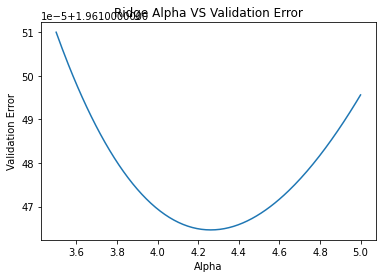

In [14]:
import matplotlib.pyplot as plt

plt.title("Ridge Alpha VS Validation Error")
plt.xlabel("Alpha")
plt.ylabel("Validation Error")
plt.plot(np.linspace(3.5, 5, 200), -model.cv_results_["mean_test_score"])

In [59]:
pd.DataFrame(
    np.concatenate(
        (model.best_estimator_.coef_, [model.best_estimator_.intercept_])
    )
).to_csv("solution.csv", index=False, header=False)